Saving tripadvisor_review.csv to tripadvisor_review (1).csv


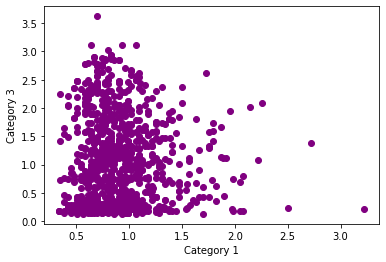

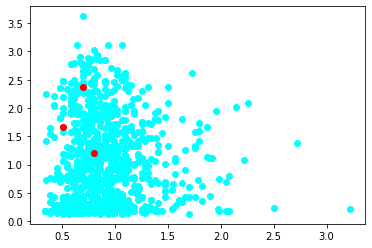

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.09799183702266706
-0.19798325521387933
-0.13301025106614317
-0.10283285234243922
-0.04991582366335845
-0.040852981551296186
-0.013257592424376408
0.0


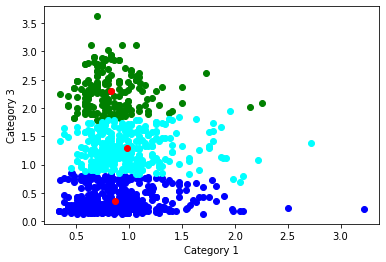

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['tripadvisor_review.csv']))

df.head()

import matplotlib.pyplot as plt

X = df[["Category 1", "Category 3"]]
plt.scatter(X["Category 1"], X["Category 3"], c="purple")
plt.xlabel("Category 1")
plt.ylabel("Category 3")
plt.show()

K=3
Centroids = (X.sample(n=K))
plt.scatter(X["Category 1"], X["Category 3"], c="cyan")
plt.scatter(Centroids["Category 1"], Centroids["Category 3"], c="red")
plt.show()

Centroids

from math import sqrt
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Category 1"]-row_d["Category 1"])**2
            d2 = (row_c["Category 3"]-row_d["Category 3"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Category 3", "Category 1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Category 3'] - Centroids['Category 3']).sum() + (Centroids_new['Category 1'] - Centroids['Category 1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Category 3","Category 1"]]

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Category 1"],data["Category 3"],c=color[k])
plt.scatter(Centroids["Category 1"],Centroids["Category 3"],c='red')
plt.xlabel('Category 1')
plt.ylabel('Category 3')
plt.show()
#https://www.kaggle.com/code/surajiiitm/k-means-clustering-in-python-from-scratch